In [65]:
import numpy as np
import sys
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stats
from scipy import stats, optimize, interpolate
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy. stats import f_oneway
from statsmodels. stats.multicomp import pairwise_tukeyhsd

In [66]:
#Загружаем датасет insurance.csv и проводим сортировку по региону
data = pd.read_csv('insurance.csv')
dataForAnova = pd.DataFrame(data, columns=['bmi', 'region'])
bmi = np.array(data['bmi'])
region = ['northeast', 'northwest', 'southeast', 'southwest']
dataForAnova

,bmi,region
0,27.900,southwest
1,33.770,southeast
2,33.000,southeast
3,22.705,northwest
4,28.880,northwest
...,...,...
1333,30.970,northwest
1334,31.920,northeast
1335,36.850,southeast
1336,25.800,southwest


In [67]:
#Однофакторный ANOVA тест
groups = dataForAnova.groupby('region').groups
groups

northeast = bmi[groups['northeast']]
northwest = bmi[groups['northwest']]
southeast = bmi[groups['southeast']]
southwest = bmi[groups['southwest']]

dataForAnova.head()


,bmi,region
0,27.900,southwest
1,33.770,southeast
2,33.000,southeast
3,22.705,northwest
4,28.880,northwest


In [68]:
# Однофакторный ANOVA тест через способо anova_lm
model = ols('bmi ~ region', data = dataForAnova).fit()
anova_result = sm.stats.anova_lm(model, typ = 2)
print(anova_result)

                sum_sq      df          F        PR(>F)
region     4055.880631     3.0  39.495057  1.881839e-24
Residual  45664.319755  1334.0        NaN           NaN


In [69]:
# Определяем Бонфферони через t критерий Стьюдента
region_paris = []

for region1 in range(3):
    for region2 in range(region1 + 1, 4):
        region_paris.append((region[region1], region[region2]))
        
region_paris

for region1, region2 in region_paris:
    print(region1, region2)
    print(stats.ttest_ind(bmi[groups[region1]], bmi[groups[region2]]))

northeast northwest
Ttest_indResult(statistic=-0.060307727183293185, pvalue=0.951929170821864)
northeast southeast
Ttest_indResult(statistic=-8.790905562598699, pvalue=1.186014937424813e-17)
northeast southwest
Ttest_indResult(statistic=-3.1169000930045923, pvalue=0.0019086161671573074)
northwest southeast
Ttest_indResult(statistic=-9.25649013552548, pvalue=2.643571405230106e-19)
northwest southwest
Ttest_indResult(statistic=-3.2844171500398582, pvalue=0.001076958496307695)
southeast southwest
Ttest_indResult(statistic=5.908373821545118, pvalue=5.4374009639680636e-09)


group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.0263,0.9999,-1.1552,1.2078,False
northeast,southeast,4.1825,0.0,3.033,5.332,True
northeast,southwest,1.4231,0.0107,0.2416,2.6046,True
northwest,southeast,4.1562,0.0,3.0077,5.3047,True
northwest,southwest,1.3968,0.0127,0.2162,2.5774,True
southeast,southwest,-2.7594,0.0,-3.9079,-1.6108,True


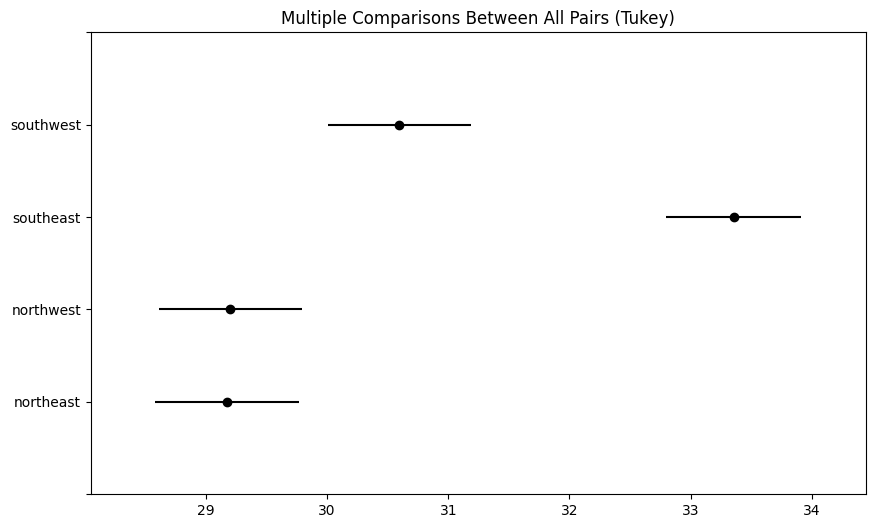

In [72]:
# Пост-хок тесты Тьюки  построение графика
tukey = pairwise_tukeyhsd(endog = data['bmi'], groups = data['region'], alpha = 0.05)
tukey.plot_simultaneous()
tukey.summary()

In [73]:
# Двухфакторный ANOVA тест, используя anova_lm
model = ols('bmi ~ region + sex + region:sex', data = data).fit()
sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
region,4034.975135,3.0,39.398134,2.163195e-24
sex,86.007035,1.0,2.519359,1.126940e-01
region:sex,174.157808,3.0,1.700504,1.650655e-01
Residual,45404.154911,1330.0,NaN,NaN


In [74]:
data['combination'] = data.region + "/" + data.sex

group1,group2,meandiff,p-adj,lower,upper,reject
northeast/female,northeast/male,-0.2998,0.9998,-2.2706,1.6711,False
northeast/female,northwest/female,-0.0464,1.0,-2.0142,1.9215,False
northeast/female,northwest/male,-0.2042,1.0,-2.1811,1.7728,False
northeast/female,southeast/female,3.3469,0.0,1.41,5.2839,True
northeast/female,southeast/male,4.6657,0.0,2.7634,6.568,True
northeast/female,southwest/female,0.7362,0.9497,-1.2377,2.71,False
northeast/female,southwest/male,1.8051,0.1007,-0.1657,3.776,False
northeast/male,northwest/female,0.2534,0.9999,-1.7083,2.2152,False
northeast/male,northwest/male,0.0956,1.0,-1.8752,2.0665,False
northeast/male,southeast/female,3.6467,0.0,1.7159,5.5775,True


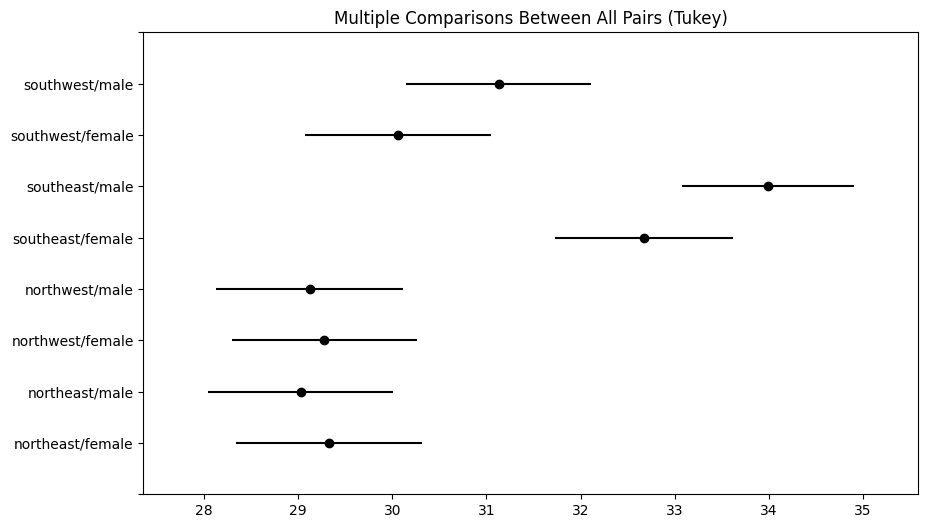

In [75]:
# Пост-хок тесты Тьюки  построение графика
tukey = pairwise_tukeyhsd(endog = data['bmi'], groups = data['combination'], alpha = 0.05)
tukey.plot_simultaneous()
tukey.summary()